In [1]:
import os, json, csv

In [2]:
# cell 1
# "." is a shorthand referring to the current directory
os.listdir(".")

['main.ipynb', 'fruit', '.DS_Store', '.ipynb_checkpoints']

In [3]:
# cell 2
#option 1
try:
    os.mkdir("fruit")
except FileExistsError:
    print("tried to create fruit, but it already existed")

# option 2
if not os.path.exists("fruit"):
    os.mkdir("fruit")
else:
    print("did not try to create fruit because it already existed")

tried to create fruit, but it already existed
did not try to create fruit because it already existed


In [4]:
path = os.path.join("fruit", "apple.txt")
path

'fruit/apple.txt'

In [5]:
basename = os.path.basename(path)
basename

'apple.txt'

In [6]:
dirname = os.path.dirname(path)
dirname

'fruit'

In [7]:
f = open(path, "w", encoding="utf-8")
f.write("apples are red\n")
f.close()

In [8]:
os.listdir("fruit")

['summary.json', 'summary2.json', 'banana.txt', 'apple.txt']

In [9]:
path2 = os.path.join("fruit", "banana.txt")
f1 = open(path2, "w", encoding="utf-8")
f1.write("bananas are yellow\n")
f1.close()

In [10]:
def fruit_message(name):
    try:
        f = open(os.path.join("fruit", name+".txt"), encoding="utf-8")
        msg = f.read()
        f.close()
        return msg
    except FileNotFoundError:
        print("bad fruit")

In [11]:
fruit_message("apple")

'apples are red\n'

In [12]:
fruit_message("orange")

bad fruit


In [13]:
# Python structures
fruits = [
    {"name": "apple", "count": 50, "tasty": True},
    {"name": "watermelon", "count": 60, "tasty": False},
    {"name": "kiwi", "count": 55, "tasty": True},
]
print("Python structs:", fruits)

# JSON string
json_str = json.dumps(fruits)
print("JSON string:", json_str)

# save to file
f = open(os.path.join("fruit", "summary.json"), "w", encoding="utf-8")
f.write(json_str)
f.close()

Python structs: [{'name': 'apple', 'count': 50, 'tasty': True}, {'name': 'watermelon', 'count': 60, 'tasty': False}, {'name': 'kiwi', 'count': 55, 'tasty': True}]
JSON string: [{"name": "apple", "count": 50, "tasty": true}, {"name": "watermelon", "count": 60, "tasty": false}, {"name": "kiwi", "count": 55, "tasty": true}]


In [14]:
# Python structures
fruits = [
    {"name": "passionfruit", "count": 100, "tasty": True},
    {"name": "lychee", "count": 60, "tasty": True},
    {"name": "mango", "count": 200, "tasty": True},
]
print("Python structs:", fruits)

# save to file
## json.dump(data, f) is a shortcut for json.dumps and f.write
f = open(os.path.join("fruit", "summary2.json"), "w", encoding="utf-8")
json.dump(fruits, f)
f.close()

Python structs: [{'name': 'passionfruit', 'count': 100, 'tasty': True}, {'name': 'lychee', 'count': 60, 'tasty': True}, {'name': 'mango', 'count': 200, 'tasty': True}]


In [15]:
# read data back
## data = json.load(f) is a shortcut for f.read and json.loads
f = open(os.path.join("fruit", "summary.json"), encoding="utf-8")
data = json.load(f)
f.close()

print(data)

[{'name': 'apple', 'count': 50, 'tasty': True}, {'name': 'watermelon', 'count': 60, 'tasty': False}, {'name': 'kiwi', 'count': 55, 'tasty': True}]


In [16]:
# csv
f = open(os.path.join("fruit", "good.csv"), "w", encoding="utf-8")
f.write("fruit,count\n")
f.write("apple,10\n")
f.write("banana,3\n")
f.write("orange,0\n")
f.close()

f = open(os.path.join("fruit", "rotten.csv"), "w", encoding="utf-8")
f.write("fruit,count\n")
f.write("apple,10\n")
f.write("banana,3\n")
f.write("orange\n")
f.close()

In [17]:
## A DictReader produces a dictionary for each row of a CSV file, automatically using the 
## header of the CSV to determine the keys for the dicts.
f = open(os.path.join("fruit", "good.csv"), encoding="utf-8")
reader = csv.DictReader(f)
for row in reader:
    print(row)
f.close()

{'fruit': 'apple', 'count': '10'}
{'fruit': 'banana', 'count': '3'}
{'fruit': 'orange', 'count': '0'}


In [19]:
# looking for specific cells and printing them
f = open(os.path.join("fruit", "rotten.csv"), encoding="utf-8")
reader = csv.DictReader(f)
for row in reader:
    print(row["fruit"], row["count"])
f.close()

apple 10
banana 3
orange None


In [20]:
# lab9-b

In [21]:
%matplotlib inline

In [22]:
import pandas as pd

# Scatter
def scatter(x, y, xlabel="please label me!", ylabel="please label me!"):
    df = pd.DataFrame({"x":x, "y":y})
    ax = df.plot.scatter(x="x", y="y", color="black", fontsize=16, xlim=0, ylim=0)
    ax.set_xlabel(xlabel, fontsize=16)
    ax.set_ylabel(ylabel, fontsize=16)
    ax.get_xaxis().get_major_formatter().set_scientific(False)
    ax.get_yaxis().get_major_formatter().set_scientific(False)

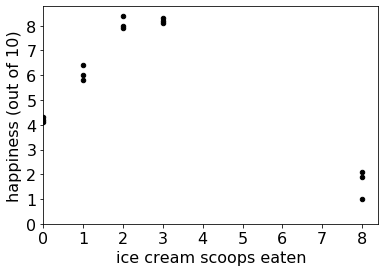

In [24]:
scatter([0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 8.0, 8.0, 8.0],
        [4.1, 4.3, 4.2, 5.8, 6.0, 6.4, 8.4, 8.0, 7.9, 8.3, 8.1, 8.2, 1.9, 2.1, 1.0], 
        xlabel="ice cream scoops eaten", ylabel="happiness (out of 10)")

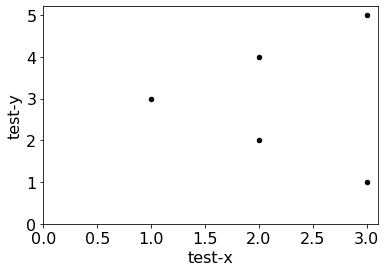

In [25]:
scatter([1.0, 2.0, 2.0, 3.0, 3.0], [3, 2, 4, 1, 5], "test-x", "test-y")

In [35]:
# Recursion
## a function is recursive when it calls itself, directly or indirectly

# Problem 1: Factorial
def fact(n):
    if n == 0 or n == 1:
        return 1
    return n * fact(n-1)

In [52]:
# Problem 2: String Reversal
## add tuple
def reverse(s):
    if len(s) <= 1:
        return s
    elif type(s) == str:
        return reverse(s[1:]) + s[0]
    elif type(s) == list:
        return reverse(s[1:]) + [s[0]]
reverse("alice")

'ecila'

In [73]:
# Problem 4: Dictionary Printer
def dprint(d, indent=0):
    print("Dictionary:")
    for k in d:
        v = d[k]
        print(" " * indent, end="")
        print(k + " => ", end="")
        if type(v) == dict:
            dprint(v, indent + 2)
        else:
            print(v)
dprint({"A": 1, "B": {"C": 2, "D": 3, "E": {"F": 4}}, "G": 5}, 0)

Dictionary:
A => 1
B => Dictionary:
  C => 2
  D => 3
  E => Dictionary:
    F => 4
G => 5


In [64]:
# List Comprehensions
nums = [500, 100, 200, 300, 400]
new_nums = [x+1 for x in nums]
new_nums

[501, 101, 201, 301, 401]

In [65]:
nums = [500, 100, 200, 300, 400]
doubles = [orig_num*2 for orig_num in nums]
doubles

[1000, 200, 400, 600, 800]

In [67]:
words = ["Apple", "banana", "ORANGE"]
upper_words = [word.upper() for word in words]
upper_words

['APPLE', 'BANANA', 'ORANGE']

In [69]:
# Default Dictionaries
from collections import defaultdict

fruit_counts = defaultdict(int)
fruit_counts["apple"] = 10    # line 1: works
print(fruit_counts["apple"])  # line 2: works
print(fruit_counts["banana"]) # line 3: works

10
0


In [70]:
rows = [
     ("alice", 5),
     ("bob", 6),
     ("alice", 7),
     ("bob", 8),
]

scores = dict()
for row in rows:
    if not row[0] in scores:
        scores[row[0]] = [row[1]]
    else:
        scores[row[0]].append(row[1])

scores

{'alice': [5, 7], 'bob': [6, 8]}

In [71]:
from collections import defaultdict

rows = [
     ("alice", 5),
     ("bob", 6),
     ("alice", 7),
     ("bob", 8),
]

scores = defaultdict(list)
for row in rows:
    scores[row[0]].append(row[1]) # creates a new list if necessary

dict(scores)

{'alice': [5, 7], 'bob': [6, 8]}

In [72]:
# count letter frequencies
from collections import defaultdict

letter_counts = defaultdict(int)

for letter in "banana":
    letter_counts[letter] += 1

dict(letter_counts)

{'b': 1, 'a': 3, 'n': 2}